In [4]:
import numpy as np
import tensorflow as tf

In [5]:
# tf.keras.preprocessing.image_dataset_from_directory를 통해 directory에서 데이터 가져오기
test_dir = 'images/mnist_num/after_process/test'

def load_data(path):
    data = tf.keras.preprocessing.image_dataset_from_directory(
        path, label_mode='categorical', color_mode='grayscale',
        image_size=(150,150), batch_size=98
    )

    for i, j in data.take(1):
        X = i
        y = j

    data_X = np.squeeze(np.array(X))
    data_y = np.array(y)

    data_X = data_X.reshape((-1, 150, 150, 1))

    return data_X, data_y

X, y = load_data(test_dir)
X.shape, y.shape

Found 98 files belonging to 10 classes.


((98, 150, 150, 1), (98, 10))

In [6]:
from tensorflow.keras.models import load_model
model = load_model('my_model2.h5')

In [7]:
predict_y = model.predict(X)

In [8]:
for i in range(10):
    print('True :', str(np.argmax(y[i])) , 'Predict :', str(np.argmax(predict_y[i])))

True : 3 Predict : 3
True : 7 Predict : 7
True : 3 Predict : 3
True : 1 Predict : 1
True : 6 Predict : 6
True : 6 Predict : 6
True : 2 Predict : 2
True : 5 Predict : 3
True : 4 Predict : 4
True : 8 Predict : 3


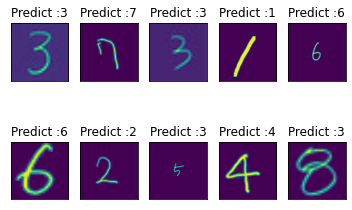

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    plt.imshow(X[i])
    plt.xticks([]), plt.yticks([])
    plt.title("Predict :" + str(np.argmax(predict_y[i])))